<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkRP0321ENSkillsNetwork25371262-2021-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0101EN-Coursera/v2/M1_R_Basics/images/IDSNlogo.png" width="200" align="center">
</a>


<h1>Refine the Baseline Regression Models</h1>

Estimated time needed: **120** minutes


## Lab Overview:

Now you have built a baseline regression model with some relatively good RMSE and R-squared reported values. However, we could still improve it by using methods like adding polynomial and interaction terms, regularization, and so on.

In this lab, you will be asked to continue using `tidymodels` to improve the performance of baseline model:

*   **TASK: Add polynomial terms**
*   **TASK: Add interactions terms**
*   **TASK: Add regularizations terms**
*   **TASK: Experiment to search for improved models**

Let's start!


First install and import necessary libraries


In [1]:
# Check whether you need to install `rlang` and `tidymodels` libraries
# install.packages("rlang")
# install.packages("tidymodels")

In [2]:
library("tidymodels")
library("tidyverse")
library("stringr")

Warning message:
"package 'tidymodels' was built under R version 3.6.3"Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip
-- Attaching packages -------------------------------------- tidymodels 0.1.3 --
v broom        0.7.8      v recipes      0.1.16
v dials        0.0.9      v rsample      0.1.0 
v dplyr        1.0.6      v tibble       3.1.1 
v ggplot2      3.3.5      v tidyr        1.1.3 
v infer        0.5.4      v tune         0.1.5 
v modeldata    0.1.0      v workflows    0.2.2 
v parsnip      0.1.6      v workflowsets 0.0.2 
v purrr        0.3.4      v yardstick    0.0.8 
Warning message:
"package 'dials' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'infer' was built under R version 3.6.3"Warning message:
"package 'modeldata' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:

The processed Seoul bike sharing dataset `seoul_bike_sharing_converted_normalized.csv`,  includes the converted indicator variables, and the numerical variables have been normalized.
Let's read it as a dataframe first:


In [3]:
# Dataset URL
dataset_url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing_converted_normalized.csv"
bike_sharing_df <- read_csv(dataset_url)
spec(bike_sharing_df)

Parsed with column specification:
cols(
  .default = col_double(),
  DATE = col_character(),
  FUNCTIONING_DAY = col_character()
)
See spec(...) for full column specifications.


cols(
  DATE = col_character(),
  RENTED_BIKE_COUNT = col_double(),
  TEMPERATURE = col_double(),
  HUMIDITY = col_double(),
  WIND_SPEED = col_double(),
  VISIBILITY = col_double(),
  DEW_POINT_TEMPERATURE = col_double(),
  SOLAR_RADIATION = col_double(),
  RAINFALL = col_double(),
  SNOWFALL = col_double(),
  FUNCTIONING_DAY = col_character(),
  `0` = col_double(),
  `1` = col_double(),
  `10` = col_double(),
  `11` = col_double(),
  `12` = col_double(),
  `13` = col_double(),
  `14` = col_double(),
  `15` = col_double(),
  `16` = col_double(),
  `17` = col_double(),
  `18` = col_double(),
  `19` = col_double(),
  `2` = col_double(),
  `20` = col_double(),
  `21` = col_double(),
  `22` = col_double(),
  `23` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double(),
  `8` = col_double(),
  `9` = col_double(),
  AUTUMN = col_double(),
  SPRING = col_double(),
  SUMMER = col_double(),
  WINTER = col_double(),
  HOLIDAY 

We won't be using the `DATE` column, because 'as is', it basically acts like an data entry index. (However, given more time, we could use the `DATE` colum to create a 'day of week' or 'isWeekend' column, which we might expect has an affect on preferred bike rental times.) We also do not need the `FUNCTIONAL DAY` column because it only has one distinct value remaining (`YES`) after missing value processing.


In [4]:
bike_sharing_df <- bike_sharing_df %>% 
                   select(-DATE, -FUNCTIONING_DAY)

Define a linear regression model specification.


In [5]:
lm_spec <- linear_reg() %>%
  set_engine("lm") %>% 
  set_mode("regression")

Split the data into training and testing datasets.


In [6]:
set.seed(1234)
data_split <- initial_split(bike_sharing_df, prop = 4/5)
train_data <- training(data_split)
test_data <- testing(data_split)

Now we are ready to refine the previous baseline regression model.


# TASK: Add polynomial terms


Linear regression models are the most suitable models to capture the linear correlations among variables. However, in real world data, many relationships may be non-linear.


For example, the correlation between `RENTED_BIKE_COUNT` and `TEMPERATURE` does not look like linear:


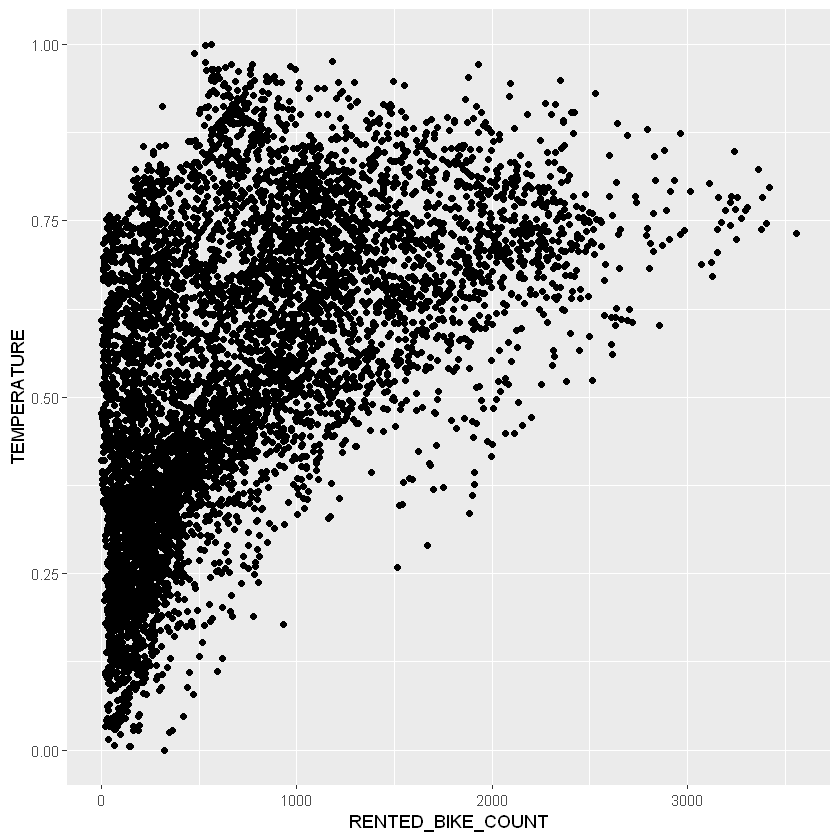

In [7]:
ggplot(data = train_data, aes(RENTED_BIKE_COUNT, TEMPERATURE)) + 
    geom_point()

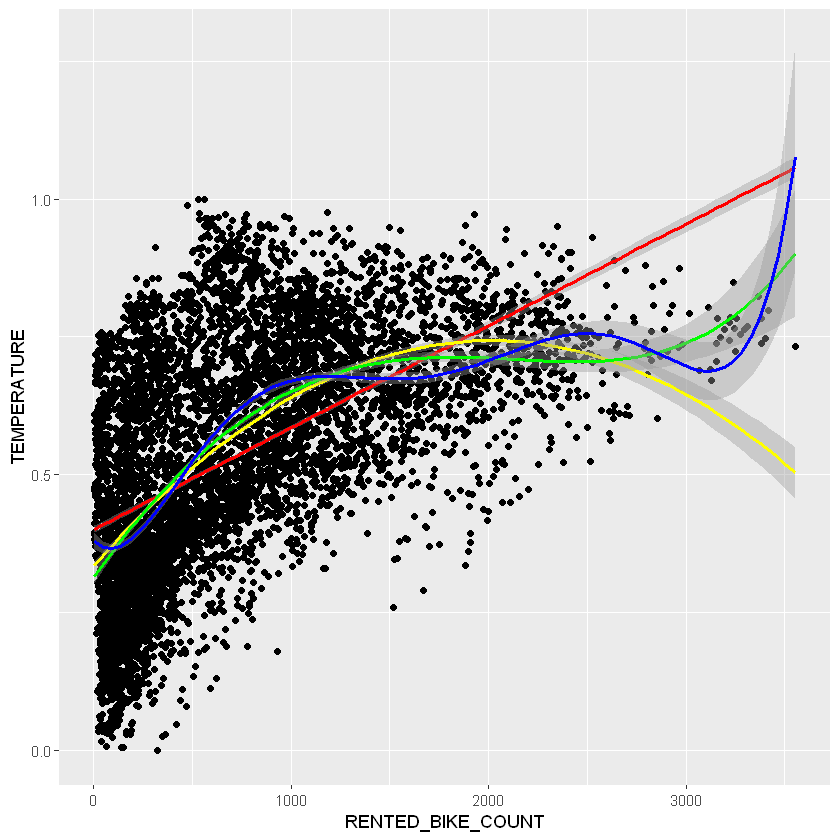

In [8]:
# Plot the higher order polynomial fits
ggplot(data=train_data, aes(RENTED_BIKE_COUNT, TEMPERATURE)) + 
    geom_point() + 
    geom_smooth(method = "lm", formula = y ~ x, color="red") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 2), color="yellow") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 4), color="green") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 6), color="blue")

OK, let's add some higher order polynomials of important variables to the regression models


*TODO:* Fit a linear regression model `lm_poly` with higher order polynomial terms on the important variables (larger coefficients) found in the baseline model


In [9]:
# Fit a linear model with higher order polynomial on some important variables 

# #HINT: Use ploy function to build polynomial terms, lm_poly <- RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) + poly(HUMIDITY, 4) .....

lm_poly <- lm_spec %>% fit(RENTED_BIKE_COUNT ~ . + poly(RAINFALL, 8) + poly(HUMIDITY, 6) + poly(TEMPERATURE, 4), data = train_data)

In [10]:
# Print model summary

# summary(lm_poly$fit)
summary(lm_poly$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ . + poly(RAINFALL, 8) + 
    poly(HUMIDITY, 6) + poly(TEMPERATURE, 4), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1426.3  -207.7     0.4   185.3  1525.7 

Coefficients: (6 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -531.661     67.134  -7.919 2.77e-15 ***
TEMPERATURE             5906.998    371.383  15.905  < 2e-16 ***
HUMIDITY                1608.994    178.127   9.033  < 2e-16 ***
WIND_SPEED                -8.472     34.673  -0.244 0.806966    
VISIBILITY               -50.053     18.184  -2.753 0.005928 ** 
DEW_POINT_TEMPERATURE  -5123.159    406.523 -12.602  < 2e-16 ***
SOLAR_RADIATION          157.107     37.005   4.246 2.21e-05 ***
RAINFALL               -1869.754    142.390 -13.131  < 2e-16 ***
SNOWFALL                 197.456     89.852   2.198 0.028013 *  
`0`                      -58.693     29.273  -2.005 0.044998 *  
`1` 

*TODO:* Make predictions on test dataset using the `lm_poly` models


In [11]:
# Use predict() function to generate test results for `lm_poly`
test_results <- lm_poly %>% 
    predict(new_data = test_data) %>% 
    mutate(truth = test_data$RENTED_BIKE_COUNT)

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"

Another minor improvement we could do here is to convert all negative prediction results to zero, because we can not have negative rented bike counts


In [12]:
# e.g., test_results[test_results<0] <- 0
test_results[test_results<0] <- 0

Now, calculate R-squared and RMSE for the test results generated by `lm_ploy` model


In [13]:
# Calculate R-squared and RMSE from the test results
rsq <- rsq(test_results, truth = truth, estimate = .pred)
rmse <- rmse(test_results, truth = truth, estimate = .pred)

rsq
rmse

.metric,.estimator,.estimate
rsq,standard,0.7611135


.metric,.estimator,.estimate
rmse,standard,312.1273


If you include all variables, and additionally include some of the more important ones as higher order poly terms, then you should notice improved  `R-squared` and `RMSE` values.


# TASK: Add interaction terms


In real-world scenarios, in addition to non-linear relationships between response variables and predictor variables, you may also encounter relationships among variables called `interaction effects`.

For example, the effect of predictor variable `TEMPERATURE` on `RENTED_BIKE_COUNT` may also depend on other variables such as `HUMIDITY`, `RAINFALL`, or both (they `interact`) and the effect of `SEASON` on `RENTED_BIKE_COUNT` may also depend on `HOLIDAY`, `HOUR`, or both.

To capture such interaction effects, we could add some interaction terms such as `RAINFALL*HUMIDITY` to the regression model, similar to what we did with polynominal terms. In this task, you will explore and conduct some experiments to search for interaction terms which will improve the model performance.


*TODO:* Try adding some interaction terms to the previous polynomial models.


In [14]:
# Add interaction terms to the poly regression built in previous step

# HINT: You could use `*` operator to create interaction terms such as HUMIDITY*TEMPERATURE and make the formula look like:
# RENTED_BIKE_COUNT ~ RAINFALL*HUMIDITY ...

lm_poly2 <- lm_spec %>% fit(RENTED_BIKE_COUNT ~ . + poly(RAINFALL, 8) + poly(HUMIDITY, 6) + poly(TEMPERATURE, 4) + RAINFALL*HUMIDITY, data = train_data)

In [15]:
# Print model summary
summary(lm_poly2$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ . + poly(RAINFALL, 8) + 
    poly(HUMIDITY, 6) + poly(TEMPERATURE, 4) + RAINFALL * HUMIDITY, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1427.27  -207.88    -0.17   185.45  1525.28 

Coefficients: (6 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -534.437     67.177  -7.956 2.08e-15 ***
TEMPERATURE             5911.142    371.392  15.916  < 2e-16 ***
HUMIDITY                1614.926    178.199   9.062  < 2e-16 ***
WIND_SPEED               -10.645     34.725  -0.307 0.759199    
VISIBILITY               -50.065     18.183  -2.753 0.005915 ** 
DEW_POINT_TEMPERATURE  -5128.691    406.543 -12.615  < 2e-16 ***
SOLAR_RADIATION          158.508     37.025   4.281 1.89e-05 ***
RAINFALL                6067.438   6983.073   0.869 0.384945    
SNOWFALL                 193.868     89.905   2.156 0.031091 *  
`0`                      -58.506

In [16]:
# Calculate R-squared and RMSE for the new model to see if performance has improved
test_results2 <- lm_poly2 %>% 
    predict(new_data = test_data) %>% 
    mutate(truth = test_data$RENTED_BIKE_COUNT)

rsq <- rsq(test_results2, truth = truth, estimate = .pred)
rmse <- rmse(test_results2, truth = truth, estimate = .pred)

rsq
rmse

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"

.metric,.estimator,.estimate
rsq,standard,0.7393688


.metric,.estimator,.estimate
rmse,standard,323.159


# TASK: Add regularization


In previous tasks, you were asked to add polynominal and interaction terms to the model, aiming to capture nonlinearity and interaction effects between the predictor variables. Hopefully, your updated models have better R-squared and RMSE values.

However, adding these terms makes your model more complicated, more difficult to explain, and more likely to suffer from overfitting. To overcome these issues, one solution is to add regularization terms to your models.


When building the baseline model, we used the basic `lm` engine. In this task, you will use a more advanced and generalized `glmnet` engine. It provides a generalized linear model with Lasso, Ridge, and Elastic Net regularizations.

In general, using `glmnet` can enhance your models in the following ways:

*   Address overfitting issues by shrinking the coefficients
*   Address predictor variable colinearity by selecting only one variable from each group of colinear variables (by shrinking their coefficients to zero)
*   Make your models more interpretable due to simplification (fewer variables in the outcome models)


Now, let's switch our regression engine to `glmnet`


*TODO:* Define a linear regression model specification `glmnet_spec` using `glmnet` engine


In [17]:
# HINT: Use linear_reg() function with two parameters: penalty and mixture
# - penalty controls the intensity of model regularization
# - mixture controls the tradeoff between L1 and L2 regularizations

# You could manually try different parameter combinations or use grid search to find optimal combinations


glmnet_spec <- linear_reg(penalty = 0.1, mixture = 0) %>%
    set_engine("glmnet")

Fit a glmnet model called  `lm_glmnet` using the `fit()` function. For the formula part, keep the polynominal and interaction terms you used in the previous task.


In [18]:
install.packages('glmnet')
library('glmnet')


  There is a binary version available but the source version is later:
       binary source needs_compilation
glmnet  4.1-1  4.1-2              TRUE

  Binaries will be installed
package 'glmnet' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glmnet'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\esteb\anaconda3\envs\R\Lib\R\library\00LOCK\glmnet\libs\x64\glmnet.dll  a C:\Users\esteb\anaconda3\envs\R\Lib\R\library\glmnet\libs\x64\glmnet.dll: Permission denied"Warning message:
"restored 'glmnet'"


The downloaded binary packages are in
	C:\Users\esteb\AppData\Local\Temp\RtmpM9AWI9\downloaded_packages


Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loaded glmnet 4.1-1


In [19]:
# Fit a glmnet model using the fit() function
lm_glmnet <- glmnet_spec %>% fit(RENTED_BIKE_COUNT ~ . + poly(RAINFALL, 8) + poly(HUMIDITY, 6) + poly(TEMPERATURE, 4) + HUMIDITY*TEMPERATURE, data = train_data)

In [20]:
# Report rsq and rmse of the `lm_glmnet` model
test_results3 <- lm_glmnet %>% 
    predict(new_data = test_data) %>% 
    mutate(truth = test_data$RENTED_BIKE_COUNT)

rsq <- rsq(test_results3, truth = truth, estimate = .pred)
rmse <- rmse(test_results3, truth = truth, estimate = .pred)

rsq
rmse

.metric,.estimator,.estimate
rsq,standard,0.7385422


.metric,.estimator,.estimate
rmse,standard,324.2954


# TASK: Experiment to search for improved models


Now you understand some of the methods that you can use to try to improve your models.


*TODO:* Experiment by building and testing at least five different models. For each of your experiments, include polynomial terms, interaction terms, and one of the three regularizations we introduced.


In [29]:
# Build at least five different models using polynomial terms, interaction terms, and regularizations.

model1 <- lm_spec %>% fit(RENTED_BIKE_COUNT ~ ., data = train_data)
#summary(model1$fit)

model2 <- lm_spec %>% fit(RENTED_BIKE_COUNT ~ . + poly(RAINFALL,8) + poly(TEMPERATURE,6) + RAINFALL*HUMIDITY, data = train_data)
#summary(model2$fit)

model3 <- lm_spec %>%  fit(RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL, data = train_data)

model4 <- lm_spec %>% fit(RENTED_BIKE_COUNT ~ . + poly(RAINFALL, 8) + poly(HUMIDITY, 6) + poly(TEMPERATURE, 4), data = train_data)

model5 <- glmnet_spec %>% fit(RENTED_BIKE_COUNT ~ . + poly(RAINFALL, 8) + poly(HUMIDITY, 6) + poly(TEMPERATURE, 4) + HUMIDITY*TEMPERATURE, data = train_data)

test_results1 <- model1 %>% 
    predict(new_data = test_data) %>% 
    mutate(truth = test_data$RENTED_BIKE_COUNT)
test_results1[test_results1<0] <- 0

test_results2 <- model2 %>% 
    predict(new_data = test_data) %>% 
    mutate(truth = test_data$RENTED_BIKE_COUNT)
test_results2[test_results2<0] <- 0

test_results3 <- model3 %>% 
    predict(new_data = test_data) %>% 
    mutate(truth = test_data$RENTED_BIKE_COUNT)
test_results3[test_results3<0] <- 0

test_results4 <- model4 %>% 
    predict(new_data = test_data) %>% 
    mutate(truth = test_data$RENTED_BIKE_COUNT)
test_results4[test_results4<0] <- 0

test_results5 <- model5 %>% 
    predict(new_data = test_data) %>% 
    mutate(truth = test_data$RENTED_BIKE_COUNT)
test_results5[test_results5<0] <- 0

# Save their rmse and rsq values

rsq1 <- rsq(test_results1, truth = truth, estimate = .pred)
rmse1 <- rmse(test_results1, truth = truth, estimate = .pred)

rsq2 <- rsq(test_results2, truth = truth, estimate = .pred)
rmse2 <- rmse(test_results2, truth = truth, estimate = .pred)

rsq3 <- rsq(test_results3, truth = truth, estimate = .pred)
rmse3 <- rmse(test_results3, truth = truth, estimate = .pred)

rsq4 <- rsq(test_results4, truth = truth, estimate = .pred)
rmse4 <- rmse(test_results4, truth = truth, estimate = .pred)

rsq5 <- rsq(test_results5, truth = truth, estimate = .pred)
rmse5 <- rmse(test_results5, truth = truth, estimate = .pred)

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"

In [33]:
# Report the best performed model in terms of rmse and rsq
model_names <- c("model1", "model2", "model3", "model4", "model5")
rsq <- c(rsq1$.estimate, rsq2$.estimate, rsq3$.estimate, rsq4$.estimate, rsq5$.estimate)
rmse <- c(rmse1$.estimate, rmse2$.estimate, rmse3$.estimate, rmse4$.estimate, rmse5$.estimate)
comparison_df <- data.frame(model_names, rsq, rmse)

comparison_df

model_names,rsq,rmse
model1,0.6899307,354.7942
model2,0.7487758,320.2849
model3,0.4417300,473.0575
model4,0.7611135,312.1273
model5,0.7602096,314.7939


In [76]:
model_names <- c("model1", "model1", "model2", "model2", "model3", "model3", "model4", "model4", "model5", "model5")
stat <- c("rsq", "rmse", "rsq", "rmse", "rsq", "rmse", "rsq", "rmse", "rsq", "rmse")
estimate <- c(rsq1$.estimate, rmse1$.estimate, rsq2$.estimate, rmse2$.estimate, rsq3$.estimate, rmse3$.estimate, rsq4$.estimate, rmse4$.estimate, rsq5$.estimate, rmse5$.estimate)
comparison_df <- data.frame(model_names, stat, estimate)

comparison_df

model_names,stat,estimate
model1,rsq,0.6899307
model1,rmse,354.7942296
model2,rsq,0.7487758
model2,rmse,320.2848804
model3,rsq,0.4417300
model3,rmse,473.0574668
model4,rsq,0.7611135
model4,rmse,312.1272570
model5,rsq,0.7602096
model5,rmse,314.7939102


Here are the performance requirements for your best model:

*   The RMSE should be less than 330 (rougly 10% of the max value in test dataset)
*   R-squared should be greater than 0.72


*TODO:* Visualize the saved RMSE and R-squared values using a grouped barchart


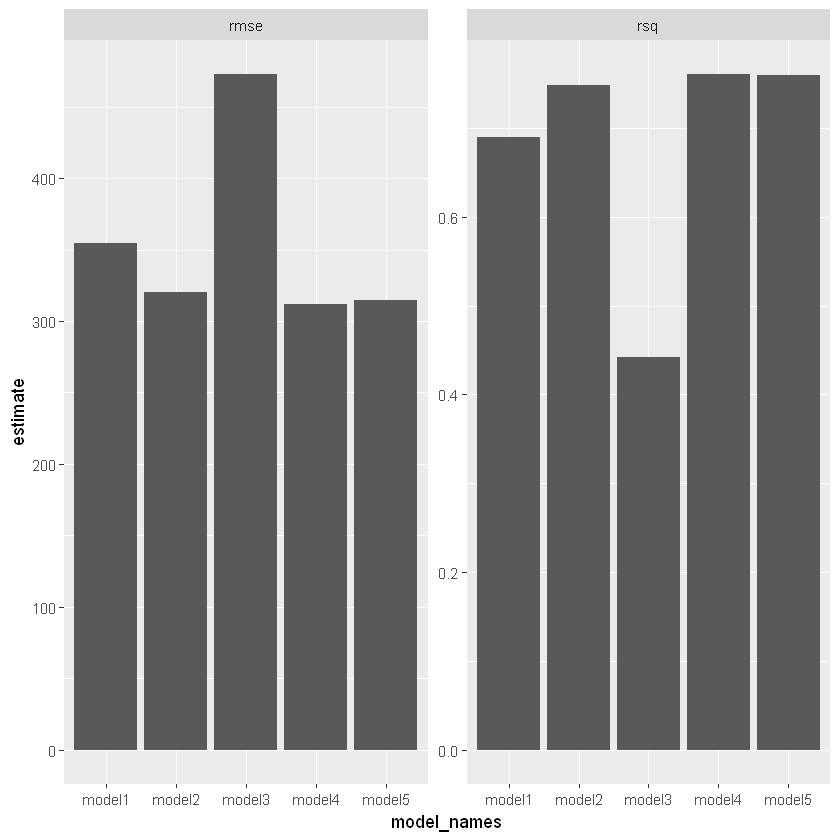

In [83]:
# HINT: Use ggplot() + geom_bar()
ggplot(data = comparison_df, aes(x=model_names, y= estimate)) + 
geom_bar(stat="identity") + facet_wrap(.~stat, scales = "free_y")

*TODO:* Create a Q-Q plot by plotting the distribution difference between the predictions generated by your best model and the true values on the test dataset.


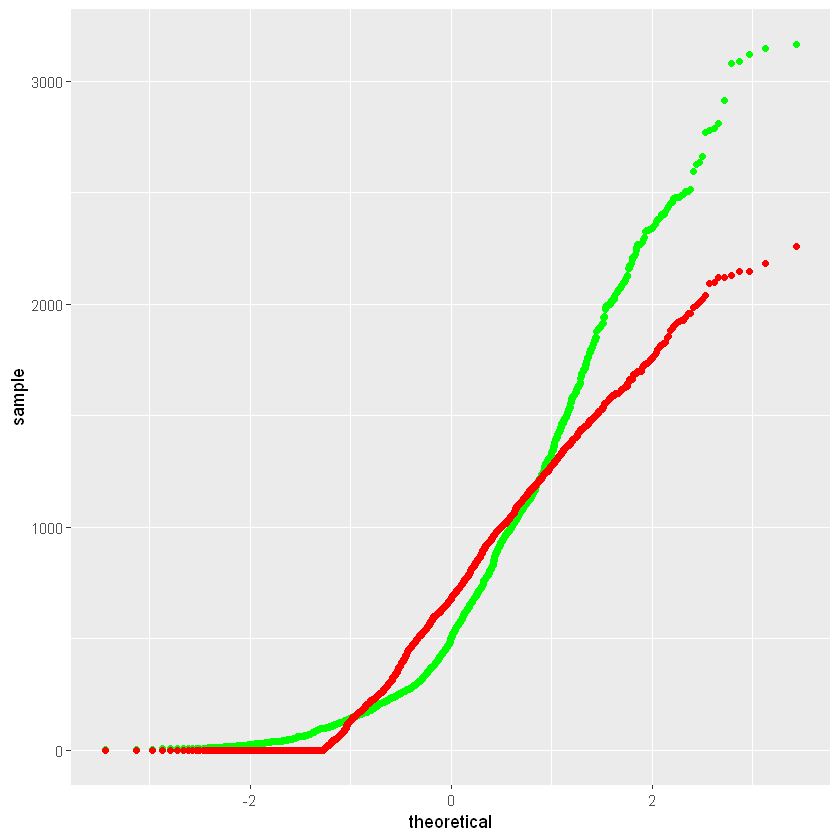

In [84]:
# HINT: Use ggplot() +
    # stat_qq(aes(sample=truth), color='green') +
    # stat_qq(aes(sample=prediction), color='red')

ggplot(data = test_results4) +
stat_qq(aes(sample=truth), color='green') +
stat_qq(aes(sample= .pred), color='red')

One example of such Q-Q plot may look like this:


<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkRP0321ENSkillsNetwork25371262-2021-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/module_4/images/example_qq_plot.png" width="600" align="center">
</a>


# More model improvment methods beyond this course


In addition to the methods mentioned in this lab and previous data analysis courses, you could also explore to try the following methods yourself to see if they could improve model performance:

*   Remove potential redundant variables. If two variables have extremly high correlated, it is possible that they are redundant and could be removed from the model to improve the performance.
*   Remove some outliers. Linear regression models are very sensitive to outliers, you could try to remove some outliers to see if it would improve performance
*   Apply logarithm transformation. In case variable distributions are not normal distribution such as log-normal distribution, you could apply logaritm transformation on the variable to make them more look like normal distribution. In addition, logarithm transformation helps capture the non-linear relationships.

If you have time, you could research and try more methods by searching related research papers/articles, discussion forums, etc. If you know how to use other machine learning models with `Tidymodels` such as Neural Networks, Tree models, or Boosting models, you can also try and compare them with the linear regression models.


# Next Steps:


Great! You have improved your baseline model using polynomial terms, interaction terms, and regularizations, and have found your best model.

Now it's time to build an interactive dashboard to provide more interactive user-interactions.


## Authors

<a href="https://www.linkedin.com/in/yan-luo-96288783/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkRP0321ENSkillsNetwork25371262-2021-01-01" target="_blank">Yan Luo</a>


### Other Contributors

Jeff Grossman


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-04-08        | 1.0     | Yan        | Initial version created |
|                   |         |            |                         |
|                   |         |            |                         |

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
